In [86]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Get to know about the data

To over view the dataset we got. 

In [87]:
data_raw = pd.read_csv('data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [88]:
print(data.info())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

In [89]:
for col in data: 
    count_nan = data[col].isnull().sum()
    print ('Count of NaN in '+col+': ' + str(count_nan))

Count of NaN in EXT1: 1783
Count of NaN in EXT2: 1783
Count of NaN in EXT3: 1783
Count of NaN in EXT4: 1783
Count of NaN in EXT5: 1783
Count of NaN in EXT6: 1783
Count of NaN in EXT7: 1783
Count of NaN in EXT8: 1783
Count of NaN in EXT9: 1783
Count of NaN in EXT10: 1783
Count of NaN in EST1: 1783
Count of NaN in EST2: 1783
Count of NaN in EST3: 1783
Count of NaN in EST4: 1783
Count of NaN in EST5: 1783
Count of NaN in EST6: 1783
Count of NaN in EST7: 1783
Count of NaN in EST8: 1783
Count of NaN in EST9: 1783
Count of NaN in EST10: 1783
Count of NaN in AGR1: 1783
Count of NaN in AGR2: 1783
Count of NaN in AGR3: 1783
Count of NaN in AGR4: 1783
Count of NaN in AGR5: 1783
Count of NaN in AGR6: 1783
Count of NaN in AGR7: 1783
Count of NaN in AGR8: 1783
Count of NaN in AGR9: 1783
Count of NaN in AGR10: 1783
Count of NaN in CSN1: 1783
Count of NaN in CSN2: 1783
Count of NaN in CSN3: 1783
Count of NaN in CSN4: 1783
Count of NaN in CSN5: 1783
Count of NaN in CSN6: 1783
Count of NaN in CSN7: 178

# Step 2: Clean the dataset

In [90]:
for col in data: 
    count_nan = data[col].isnull().sum()
    print ('Count of NaN in '+col+': ' + str(count_nan))

Count of NaN in EXT1: 1783
Count of NaN in EXT2: 1783
Count of NaN in EXT3: 1783
Count of NaN in EXT4: 1783
Count of NaN in EXT5: 1783
Count of NaN in EXT6: 1783
Count of NaN in EXT7: 1783
Count of NaN in EXT8: 1783
Count of NaN in EXT9: 1783
Count of NaN in EXT10: 1783
Count of NaN in EST1: 1783
Count of NaN in EST2: 1783
Count of NaN in EST3: 1783
Count of NaN in EST4: 1783
Count of NaN in EST5: 1783
Count of NaN in EST6: 1783
Count of NaN in EST7: 1783
Count of NaN in EST8: 1783
Count of NaN in EST9: 1783
Count of NaN in EST10: 1783
Count of NaN in AGR1: 1783
Count of NaN in AGR2: 1783
Count of NaN in AGR3: 1783
Count of NaN in AGR4: 1783
Count of NaN in AGR5: 1783
Count of NaN in AGR6: 1783
Count of NaN in AGR7: 1783
Count of NaN in AGR8: 1783
Count of NaN in AGR9: 1783
Count of NaN in AGR10: 1783
Count of NaN in CSN1: 1783
Count of NaN in CSN2: 1783
Count of NaN in CSN3: 1783
Count of NaN in CSN4: 1783
Count of NaN in CSN5: 1783
Count of NaN in CSN6: 1783
Count of NaN in CSN7: 178

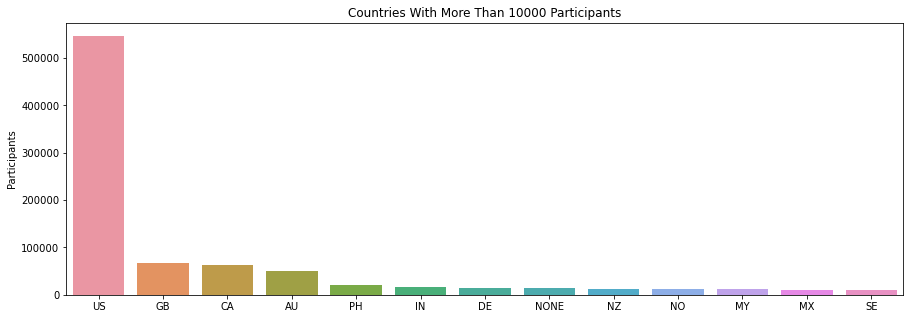

In [92]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_10000 = countries[countries['country'] >= 10000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_10000, x=countries_10000.index, y='country')
plt.title('Countries With More Than 10000 Participants')
plt.ylabel('Participants');

As we can know, the dataset is focus on personality, while country has no 
contribute to one's personality. So we decide to drop country column.

In [93]:
data = data.drop(columns=['country'])
data.head(5)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [ ]:
#data.dropna(axis='index')
rtd = data[data.isna().any(axis=1)]
#for index in rtd.index: 
#    data = data.drop([index])
data = data.drop(rtd)
data[data.isna().any(axis=1)]

In [ ]:
data.isnull().values.any()

In [ ]:
print('Number of data: ', len(data))
data.head()

# Step 3: Train using this dataset. 

In [ ]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans
df_model = data

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [ ]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Personality_type'] = predictions
df_model.head()

# Step 4: Know about the result. 

In [ ]:
df_model.Personality_type.value_counts()


In [ ]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');